# Import libs

In [29]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [12]:
# Import required modules
sys.path.append('../')  # Go up one directory

from src.data_splitting import split_data, get_split_shapes
from src.model_training import train_all_models, get_models, train_and_evaluate
from src.model_evaluation import summarize_results, plot_confusion_matrices

# 1 - Load and split the dataset

In [31]:
# Read in the cleaned data
cleaned_df = pd.read_csv('..\\data\\final_data\\cleaned_allworkers.csv')
print(f"Dataset shape: {cleaned_df.shape}")

splits = split_data(cleaned_df, test_size=0.2, random_state=42)

print(get_split_shapes(splits))

Dataset shape: (8840, 135)

main_activity splits:
X_train shape: (7072, 132)
X_test shape: (1768, 132)
y_train shape: (7072,)
y_test shape: (1768,)

label splits:
X_train shape: (7072, 132)
X_test shape: (1768, 132)
y_train shape: (7072,)
y_test shape: (1768,)

sharpness splits:
X_train shape: (7072, 132)
X_test shape: (1768, 132)
y_train shape: (7072,)
y_test shape: (1768,)
None


# 2 - Train and evaluate models for each target

In [32]:
print("\nTraining baseline models...")
results = {}


Training baseline models...


## 2.1 - Main activity (Boning/Slicing)

In [33]:
print("\nTraining Main Activity Models...")
X_train, X_test, y_train, y_test = splits['main_activity']
binary_models = get_models(task_type='binary')

results['main_activity'] = train_and_evaluate(
    X_train, X_test, y_train, y_test,
    task_type='binary',
    task_name='Main Activity'
)


Training Main Activity Models...

Training models for Main Activity...

Training Logistic Regression...
Accuracy: 0.8117

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       931
           1       0.82      0.78      0.80       837

    accuracy                           0.81      1768
   macro avg       0.81      0.81      0.81      1768
weighted avg       0.81      0.81      0.81      1768


Confusion Matrix:
[[784 147]
 [186 651]]

Training Random Forest...
Accuracy: 0.9214

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       931
           1       0.94      0.89      0.91       837

    accuracy                           0.92      1768
   macro avg       0.92      0.92      0.92      1768
weighted avg       0.92      0.92      0.92      1768


Confusion Matrix:
[[887  44]
 [ 95 742]]

Training XGBoost...
Accuracy: 0.9514

Classific

## 2.2 - Label/Sub-activity (Multiclass)

In [34]:
print("\nTraining Label Models...")
X_train, X_test, y_train, y_test = splits['label']
results['label'] = train_and_evaluate(
    X_train, X_test, y_train, y_test,
    task_type='multiclass',
    task_name='Label'
)


Training Label Models...

Training models for Label...

Training Decision Tree...
Accuracy: 0.4270

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.43      0.41       214
           1       0.14      0.14      0.14        49
           2       0.35      0.37      0.36       166
           3       0.09      0.09      0.09        78
           4       0.64      0.59      0.61       883
           5       0.17      0.18      0.18       204
           6       0.04      0.04      0.04        24
           7       0.07      0.11      0.08        28
           8       0.18      0.20      0.19       122

    accuracy                           0.43      1768
   macro avg       0.23      0.24      0.23      1768
weighted avg       0.44      0.43      0.43      1768


Confusion Matrix:
[[ 92   7  29   7  49  18   0   2  10]
 [  9   7   3   2  16   4   2   2   4]
 [ 34   4  62   7  31  15   2   3   8]
 [  6   3   8   7  25  14   1   3  

d:\MotionDataAnalysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\MotionDataAnalysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\MotionDataAnalysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6035

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.56      0.65       214
           1       0.00      0.00      0.00        49
           2       0.91      0.39      0.54       166
           3       0.00      0.00      0.00        78
           4       0.57      0.99      0.73       883
           5       0.00      0.00      0.00       204
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00        28
           8       0.71      0.04      0.08       122

    accuracy                           0.60      1768
   macro avg       0.33      0.22      0.22      1768
weighted avg       0.52      0.60      0.50      1768


Confusion Matrix:
[[120   0   4   0  88   2   0   0   0]
 [ 11   0   0   0  38   0   0   0   0]
 [ 14   0  64   0  87   0   0   0   1]
 [  5   0   0   0  71   2   0   0   0]
 [  3   0   1   0 878   0   0   0   1]
 [  0   0   0   0 204   0   0   0   0]
 

## 2.3 - Knife Sharpness

In [35]:
print("\nTraining Knife Sharpness Models...")
X_train, X_test, y_train, y_test = splits['sharpness']
results['sharpness'] = train_and_evaluate(
    X_train, X_test, y_train, y_test,
    task_type='three_class',
    task_name='Knife Sharpness'
)


Training Knife Sharpness Models...

Training models for Knife Sharpness...

Training Decision Tree...
Accuracy: 0.4876

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.31      0.30       302
           1       0.50      0.48      0.49       693
           2       0.55      0.57      0.56       773

    accuracy                           0.49      1768
   macro avg       0.45      0.45      0.45      1768
weighted avg       0.49      0.49      0.49      1768


Confusion Matrix:
[[ 93  95 114]
 [116 332 245]
 [104 232 437]]

Training Random Forest...
Accuracy: 0.6012

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.24      0.32       302
           1       0.61      0.63      0.62       693
           2       0.61      0.71      0.66       773

    accuracy                           0.60      1768
   macro avg       0.58      0.53      0.53      1768
weighted avg    

# 3 - Summarize and visualize results

In [36]:
summary = summarize_results(results)


Results for main_activity:
--------------------------------------------------

Logistic Regression:
Accuracy: 0.8117

Random Forest:
Accuracy: 0.9214

XGBoost:
Accuracy: 0.9514

Results for label:
--------------------------------------------------

Decision Tree:
Accuracy: 0.4270

Random Forest:
Accuracy: 0.6035

XGBoost:
Accuracy: 0.6748

Results for sharpness:
--------------------------------------------------

Decision Tree:
Accuracy: 0.4876

Random Forest:
Accuracy: 0.6012

XGBoost:
Accuracy: 0.6210


# 5. Plot confusion matrices


Plotting confusion matrices...


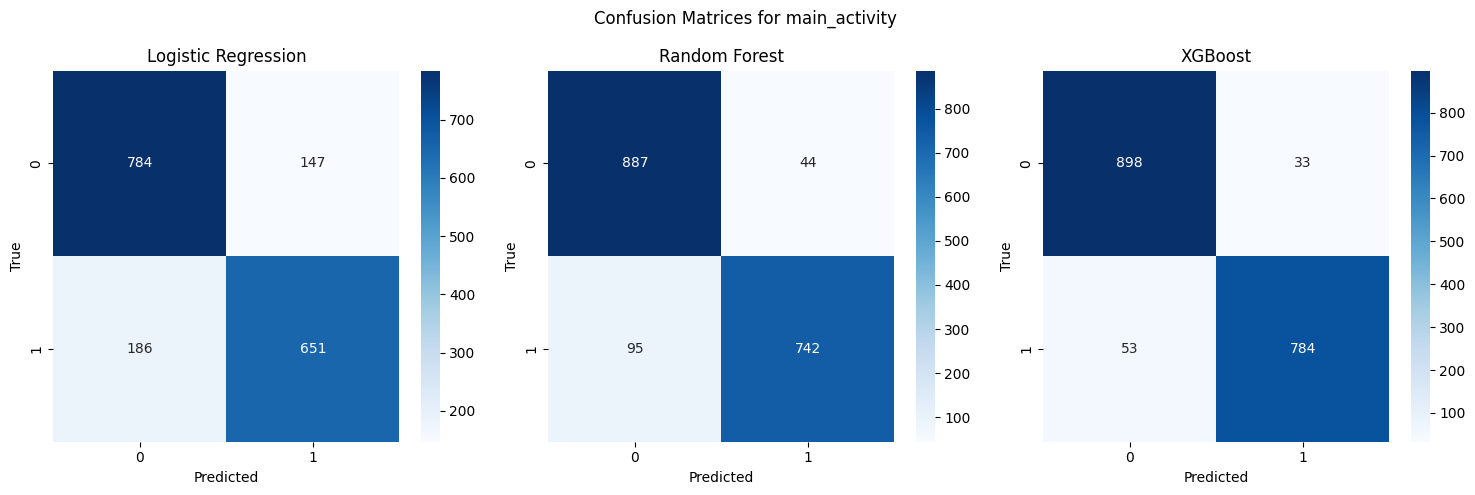

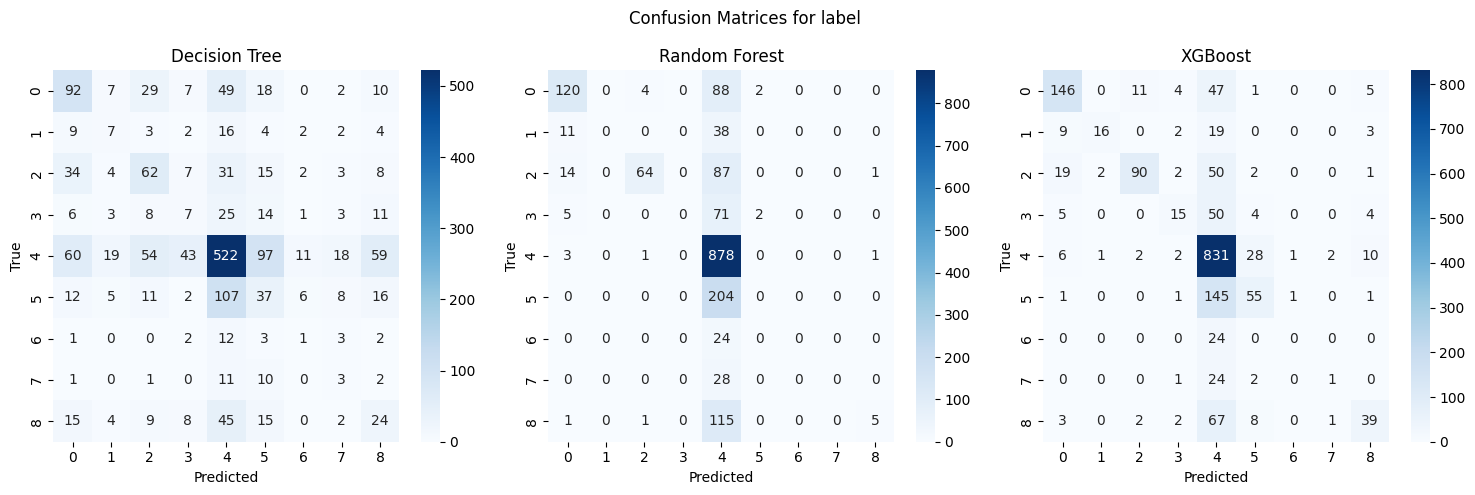

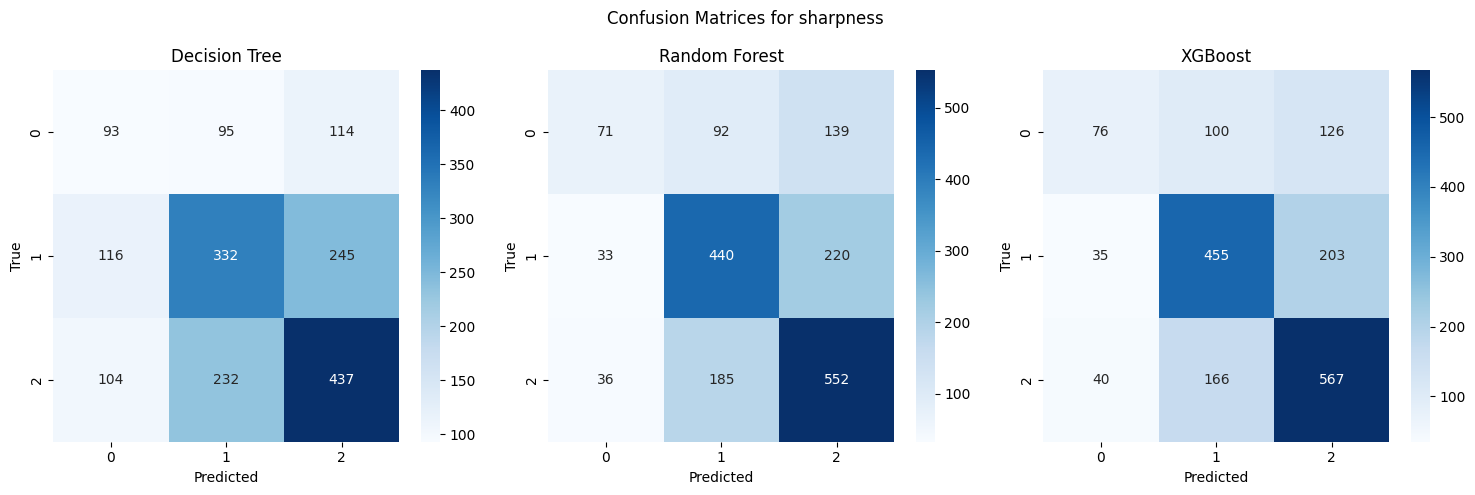

In [37]:

print("\nPlotting confusion matrices...")
plot_confusion_matrices(results)

In [38]:
# 7. Print final summary
print("\nFinal Summary:")
print("-" * 50)
for task in summary:
    print(f"\n{task}:")
    print(f"Best Model: {summary[task]['best_model']}")
    print(f"Best Accuracy: {summary[task]['best_accuracy']:.4f}")
    print("\nAll Models Accuracy:")
    for model, acc in summary[task]['all_accuracies'].items():
        print(f"{model}: {acc:.4f}")


Final Summary:
--------------------------------------------------

main_activity:
Best Model: XGBoost
Best Accuracy: 0.9514

All Models Accuracy:
Logistic Regression: 0.8117
Random Forest: 0.9214
XGBoost: 0.9514

label:
Best Model: XGBoost
Best Accuracy: 0.6748

All Models Accuracy:
Decision Tree: 0.4270
Random Forest: 0.6035
XGBoost: 0.6748

sharpness:
Best Model: XGBoost
Best Accuracy: 0.6210

All Models Accuracy:
Decision Tree: 0.4876
Random Forest: 0.6012
XGBoost: 0.6210


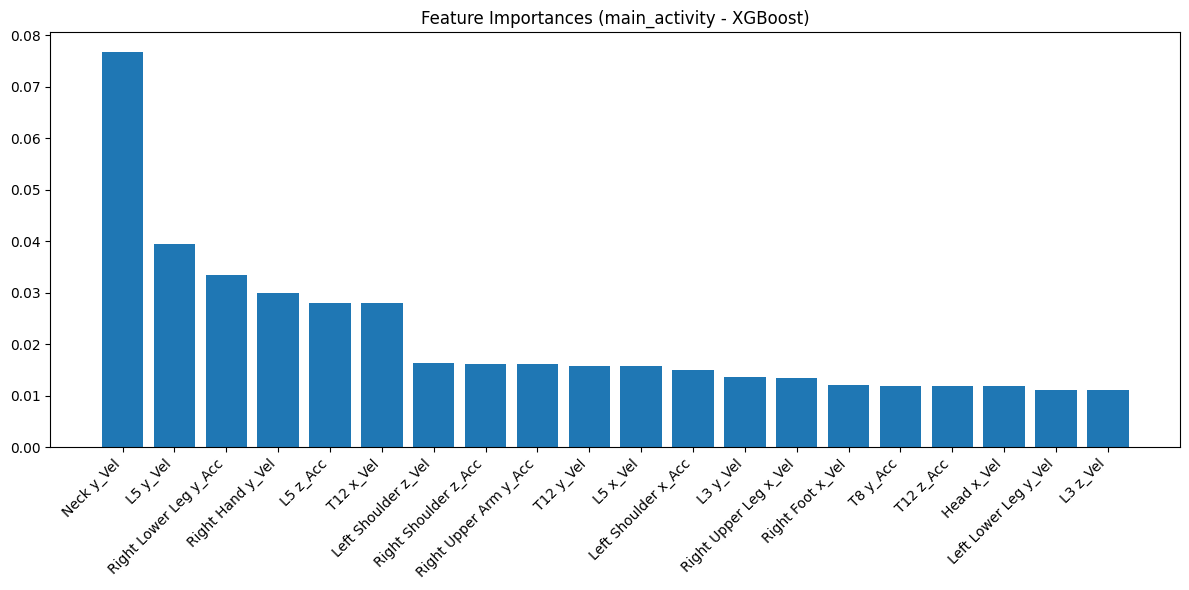

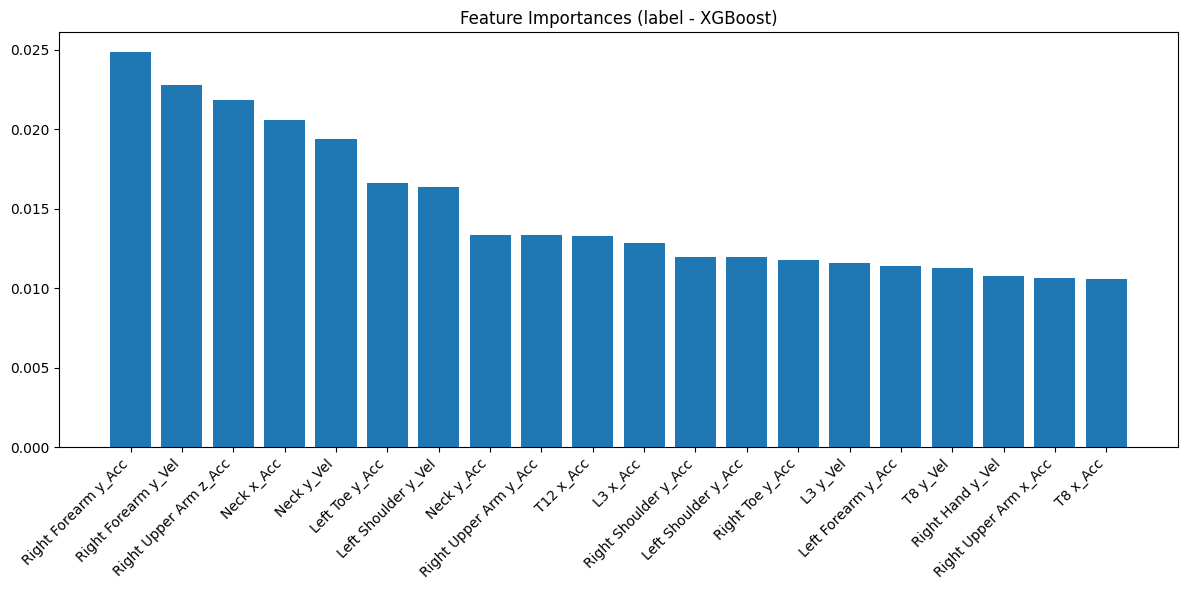

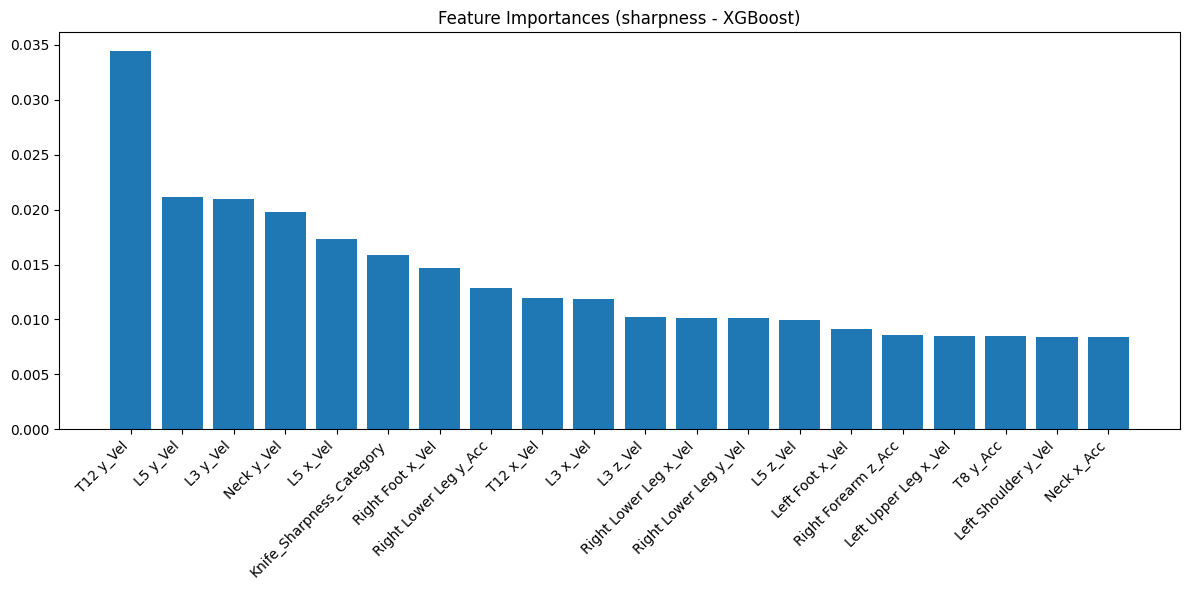

In [39]:
# 8. Feature Importance Analysis (for tree-based models)
def plot_feature_importance(model, feature_names, title):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.figure(figsize=(12, 6))
        plt.title(f"Feature Importances ({title})")
        plt.bar(range(len(indices[:20])), importances[indices[:20]])
        plt.xticks(range(len(indices[:20])), [feature_names[i] for i in indices[:20]], rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Plot feature importance for best models (if tree-based)
feature_names = [col for col in cleaned_df.columns 
                if col not in ['Main_Activity', 'Label', 'Knife_Sharpness']]

for task in results:
    best_model_name = summary[task]['best_model']
    best_model = results[task][best_model_name]['model']
    if hasattr(best_model, 'feature_importances_'):
        plot_feature_importance(best_model, feature_names, f"{task} - {best_model_name}")